In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from adam_acquire import get_titanic

Let's summarize our dataframe with some familiar methods and attributes including:
- .head()
- .shape
- .describe()

In [3]:
df = get_titanic()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df.shape

(891, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Let's take a look at each column -*IN ISOLATION*-. We are allowed to do this before splitting our data!

In [9]:
col_mask = df.dtypes == 'object'
col_mask

passenger_id    False
survived        False
pclass          False
sex              True
age             False
sibsp           False
parch           False
fare            False
embarked         True
class            True
deck             True
embark_town      True
alone           False
dtype: bool

In [13]:
for col in df.columns[col_mask]:
    
    print(df[col].value_counts())
    print()

male      577
female    314
Name: sex, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64



In [16]:
num_mask = df.dtypes != 'object'
num_mask

passenger_id     True
survived         True
pclass           True
sex             False
age              True
sibsp            True
parch            True
fare             True
embarked        False
class           False
deck            False
embark_town     False
alone            True
dtype: bool

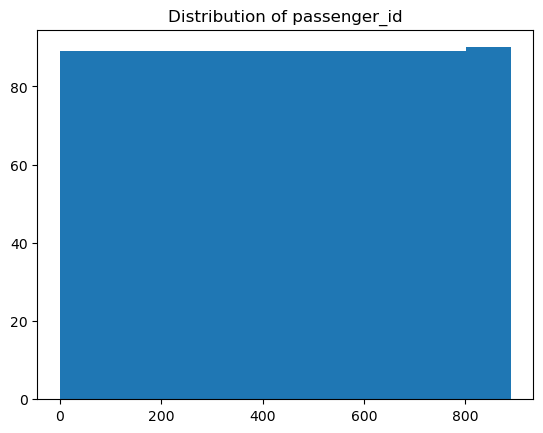

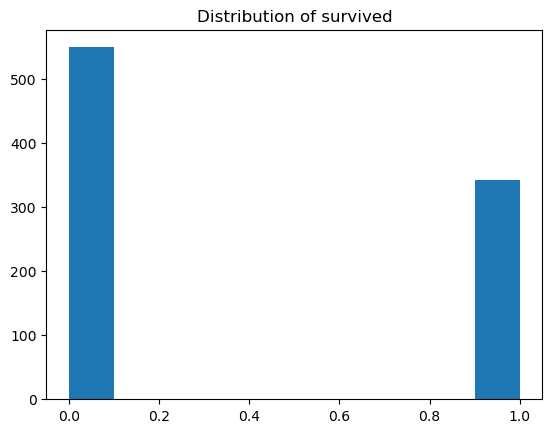

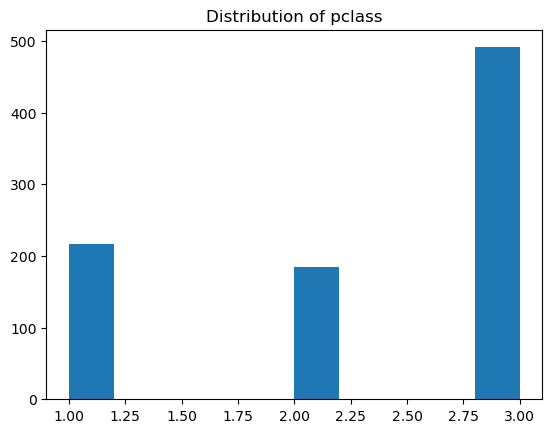

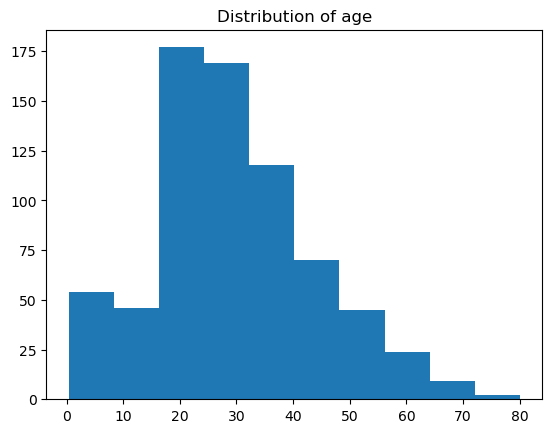

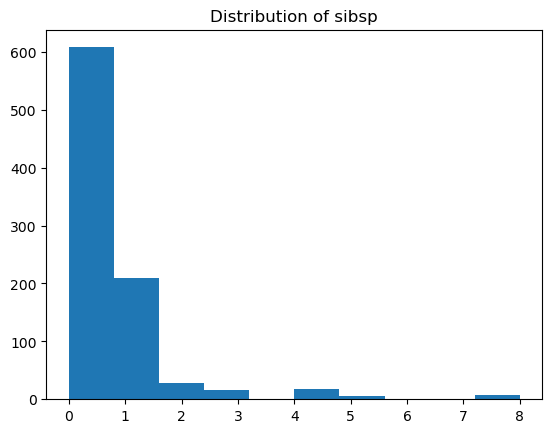

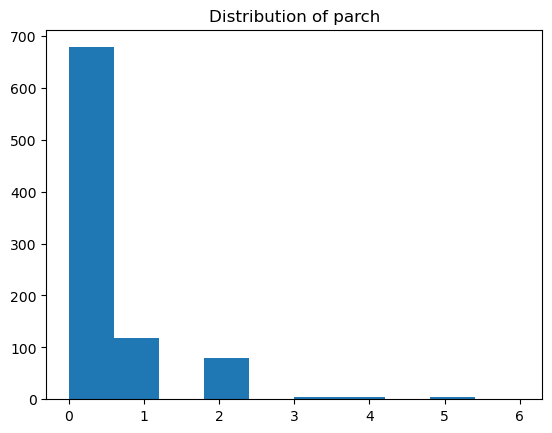

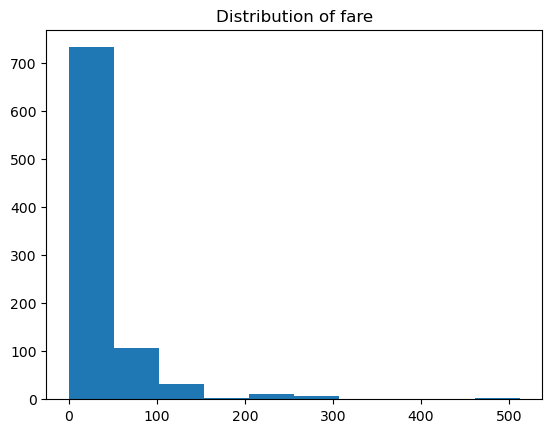

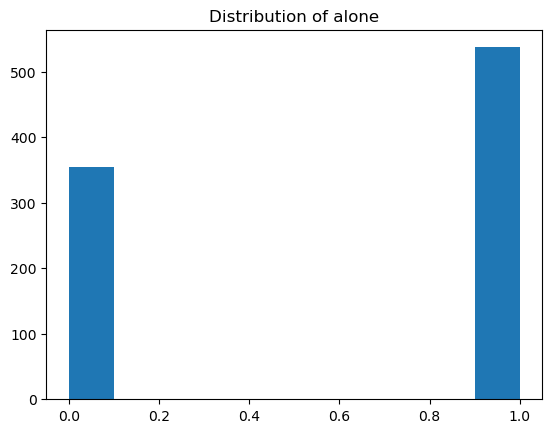

In [19]:
for col in df.columns[num_mask]:
    
    plt.figure()
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')

Let's count how many null values are present in each column.

In [24]:
round(df.isna().sum() / len(df) * 100, 2)

passenger_id     0.00
survived         0.00
pclass           0.00
sex              0.00
age             19.87
sibsp            0.00
parch            0.00
fare             0.00
embarked         0.22
class            0.00
deck            77.22
embark_town      0.22
alone            0.00
dtype: float64

What to keep and what to drop after initial summarization.

- Drop passenger_id because it doesn't hold value
- Drop embarked because it contains redundant information
- Drop pclass because it contains redundant information
- Will need to clean up embark_town and age because of null values

In [25]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [27]:
df = df.drop(columns = ['passenger_id', 'pclass', 'embarked'])
df.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,1


Let's split our data into train, validate, and test subsets before determining how to impute for null values. Otherwise this would be considered data leakage!

In [28]:
seed = 42

train, val_test = train_test_split(df, train_size = 0.7,
                                   random_state = seed,
                                   stratify = df.survived)

val, test = train_test_split(val_test, train_size = 0.5,
                             random_state = seed,
                             stratify = val_test.survived)

In [29]:
train.survived.value_counts(normalize = True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [30]:
val.survived.value_counts(normalize = True)

0    0.61194
1    0.38806
Name: survived, dtype: float64

In [31]:
test.survived.value_counts(normalize = True)

0    0.619403
1    0.380597
Name: survived, dtype: float64

Now that we have split our data, let's figure out how to deal with those pesky null values.

In [32]:
train.isna().sum()

survived         0
sex              0
age            119
sibsp            0
parch            0
fare             0
class            0
deck           488
embark_town      2
alone            0
dtype: int64

In [33]:
train.embark_town.value_counts()

Southampton    444
Cherbourg      124
Queenstown      53
Name: embark_town, dtype: int64

In [36]:
train.embark_town = train.embark_town.fillna('Southampton')
train.embark_town.isna().sum()

0

We can also use the SimpleImputer object instead of manual imputation. Both are valid!

In [38]:
train[train.age.isna()].head(10)

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
45,0,male,NaN,0,0,8.0500,Third,NaN,Southampton,1
28,1,female,NaN,0,0,7.8792,Third,NaN,Queenstown,1
633,0,male,NaN,0,0,0.0000,First,NaN,Southampton,1
727,1,female,NaN,0,0,7.7375,Third,NaN,Queenstown,1
740,1,male,NaN,0,0,30.0000,First,D,Southampton,1
64,0,male,NaN,0,0,27.7208,First,NaN,Cherbourg,1
656,0,male,NaN,0,0,7.8958,Third,NaN,Southampton,1
303,1,female,NaN,0,0,12.3500,Second,E,Queenstown,1
527,0,male,NaN,0,0,221.7792,First,C,Southampton,1
359,1,female,NaN,0,0,7.8792,Third,NaN,Queenstown,1


In [39]:
train.age.describe()

count    504.000000
mean      30.045476
std       14.502377
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

In [41]:
imputer = SimpleImputer(strategy = 'median')

imputer.fit(train[['age']])

SimpleImputer(strategy='median')

In [45]:
train.age = imputer.transform(train[['age']])
train.age.isna().sum()

0

In [46]:
val.age.isna().sum()

29

In [48]:
val.age = imputer.transform(val[['age']])
val.age.isna().sum()

0

Let's turn our work into functions! We can use a series of functions to quickly acquire and prepare our data!

In [49]:
def train_val_test(df, strat, seed = 42):
    
    train, val_test = train_test_split(df, train_size = 0.7,
                                       random_state = seed,
                                       stratify = df[strat])
    
    val, test = train_test_split(val_test, train_size = 0.5,
                                 random_state = seed,
                                 stratify = val_test[strat])
    
    return train, val, test

In [50]:
ftrain, fval, ftest = train_val_test(df, 'survived')

In [51]:
ftrain.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,D,Southampton,0
45,0,male,NaN,0,0,8.0500,Third,NaN,Southampton,1
28,1,female,NaN,0,0,7.8792,Third,NaN,Queenstown,1
633,0,male,NaN,0,0,0.0000,First,NaN,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,NaN,Southampton,0


In [52]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,D,Southampton,0
45,0,male,29.0,0,0,8.0500,Third,NaN,Southampton,1
28,1,female,29.0,0,0,7.8792,Third,NaN,Queenstown,1
633,0,male,29.0,0,0,0.0000,First,NaN,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,NaN,Southampton,0
